<a href="https://colab.research.google.com/github/marcosvnespolo/Analise_dados_PRF/blob/main/Projeto_PRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivos do Projeto

- Realizar a inspeção dos dados
- Definir variáveis importantes e recomendar ações gerais
- Realizar a análise geográfica no intuito de direcionar as ações de forma otimizada.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
### Mapeando bibliotecas necessárias para o projeto
# https://pandas.pydata.org/docs/user_guide/index.html
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
data_PRF = pd.read_csv('/content/drive/MyDrive/Pod Academy/Aula 005/datatran2023.csv',
                            delimiter=';',
                            encoding='ISO-8859-1' #'utf-8' 'latin1'
                            )
data_PRF.shape

(38408, 30)

In [4]:
# Visualizar as 5 primeiras linhas do arquivo
data_PRF.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,496519,2023-01-01,domingo,02:00:00,ES,101.0,114,SOORETAMA,Ausência de reação do condutor,Saída de leito carroçável,...,0,0,0,1,1,"-19,09484877","-40,05095848",SPRF-ES,DEL04-ES,UOP01-DEL04-ES
1,496543,2023-01-01,domingo,03:40:00,SP,116.0,"113,1",TAUBATE,Entrada inopinada do pedestre,Atropelamento de Pedestre,...,0,0,4,0,1,"-23,0445658","-45,58259814",SPRF-SP,DEL02-SP,UOP02-DEL02-SP
2,496590,2023-01-01,domingo,01:40:00,MT,163.0,1112,GUARANTA DO NORTE,Reação tardia ou ineficiente do condutor,Tombamento,...,1,0,0,1,1,"-9,70020602","-54,87588757",SPRF-MT,DEL06-MT,UOP03-DEL06-MT
3,496610,2023-01-01,domingo,10:40:00,PR,376.0,"314,8",ORTIGUEIRA,Velocidade Incompatível,Tombamento,...,0,1,0,0,1,"-23,985512","-51,083555",SPRF-PR,DEL07-PR,UOP02-DEL07-PR
4,496659,2023-01-01,domingo,14:55:00,MG,116.0,"569,4",MANHUACU,Acumulo de água sobre o pavimento,Colisão frontal,...,2,1,0,2,2,"-20,10007457","-42,17884091",SPRF-MG,DEL06-MG,UOP03-DEL06-MG


In [5]:
# Visualizar as últimas linhas do arquivo
data_PRF.tail()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
38403,541876,2023-03-13,segunda-feira,18:10:00,ES,101.0,"293,6",CARIACICA,Ausência de sinalização,Atropelamento de Pedestre,...,1,1,0,1,1,"-20,32415948","-40,3952903",SPRF-ES,DEL01-ES,UOP01-DEL01-ES
38404,542057,2023-07-29,sábado,10:00:00,GO,60.0,"164,8",GOIANIA,Velocidade Incompatível,Colisão traseira,...,0,2,0,0,2,"-16,7036","-49,342",SPRF-GO,DEL01-GO,UOP02-DEL01-GO
38405,542058,2023-07-08,sábado,18:50:00,PR,116.0,1,CAMPINA GRANDE DO SUL,Ausência de reação do condutor,Saída de leito carroçável,...,0,0,0,4,1,"-25,06368403","-48,57051896",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
38406,542112,2023-06-22,quinta-feira,05:25:00,MG,381.0,"746,5",TRES CORACOES,Condutor Dormindo,Saída de leito carroçável,...,0,53,0,1,1,"-21,618761","-45,262445",SPRF-MG,DEL16-MG,UOP02-DEL16-MG
38407,542243,2023-07-16,domingo,18:40:00,MG,40.0,510,RIBEIRAO DAS NEVES,Trafegar com motocicleta (ou similar) entre as...,Colisão lateral mesmo sentido,...,0,1,0,1,2,"-19,77463885","-44,12321882",SPRF-MG,DEL01-MG,UOP02-DEL01-MG


#### Carregando Metadados

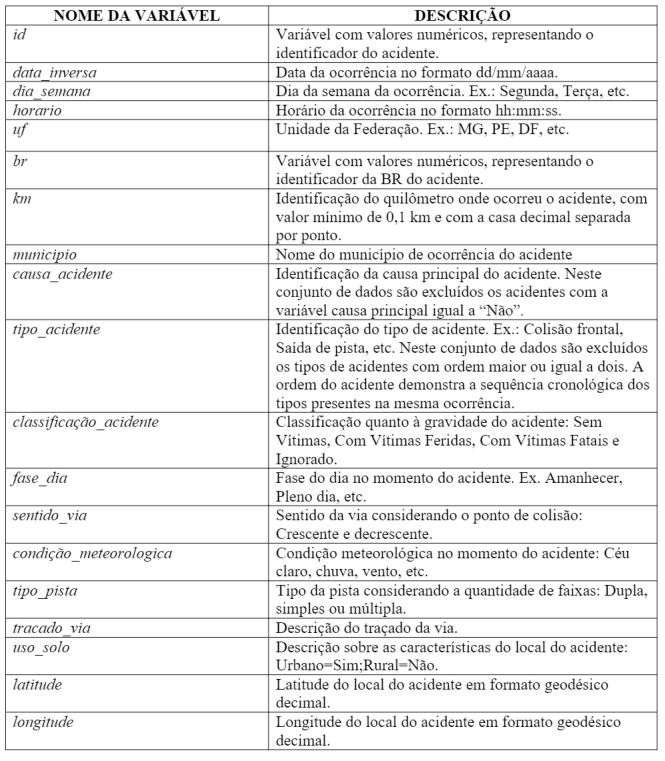

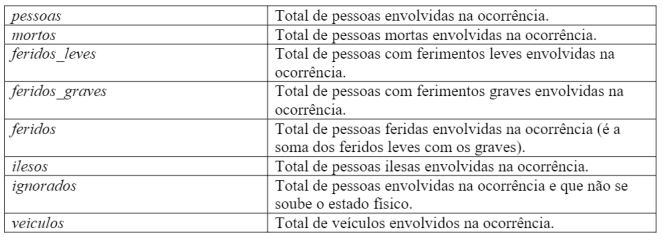

In [6]:
# verificando o tipo dos dados
data_PRF.dtypes

id                          int64
data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                        float64
km                         object
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
pessoas                     int64
mortos                      int64
feridos_leves               int64
feridos_graves              int64
ilesos                      int64
ignorados                   int64
feridos                     int64
veiculos                    int64
latitude                   object
longitude                  object
regional                   object
delegacia                  object
uop           

In [7]:
def gerar_metadados(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata


metadados = gerar_metadados(data_PRF)
metadados

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,id,int64,0,0.00,38408
1,veiculos,int64,0,0.00,13
2,feridos,int64,0,0.00,30
3,ignorados,int64,0,0.00,10
4,ilesos,int64,0,0.00,45
5,feridos_graves,int64,0,0.00,14
6,feridos_leves,int64,0,0.00,26
7,mortos,int64,0,0.00,8
8,pessoas,int64,0,0.00,52
9,br,float64,92,0.24,117


In [8]:
metadados.to_csv('/content/drive/MyDrive/Pod Academy/Aula 005/metadados.csv')

In [9]:
data_PRF.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,38408.000000,38316.000000,38408.000000,38408.00000,38408.000000,38408.000000,38408.000000,38408.000000,38408.000000,38408.000000
mean,518493.765674,210.080515,2.471386,0.08355,0.875833,0.277364,1.078187,0.156452,1.153197,1.669965
std,12414.240821,129.534618,2.217474,0.32962,1.081697,0.615291,1.818274,0.439683,1.190245,0.724583
min,496506.000000,10.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,507816.750000,101.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,518657.500000,156.000000,2.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,529239.500000,324.000000,3.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
max,542243.000000,495.000000,73.000000,7.00000,61.000000,29.000000,61.000000,14.000000,62.000000,15.000000



**PESSOAS ENVOLVIDAS:** Em média, cada acidente envolveu cerca de 2,47 pessoas.

**ACIDENTES COM MORTE:** A média de mortos por acidente ficou em torno de 0,08, o que sugere que a maioria dos acidentes não possui vítimas fatais

**FERIDOS LEVES E GRAVES:** A média de feridos leves ficou em torno de 0,88 pessoas por acidente, o que é considerávelmente maior do que a média de 0,28 para feridos graves, o que indica que grande parte dos acidentes foi de menor gravidade

**IGNORADOS:** O estado de saúde de certa de 0,16 pessoas por acidente é desconhecido.


# INSIGTS

Através de uma rápida análise das estatísticas descritivas, é possível sugerir algumas ações que poderiam ser interessantes:

**IDENTIFICAR RODOVIAS DE ALTO RISCO:** As estatísticas fornecidas podem nos ajudar a identificar em quais rodovias os acidentes são mais frequentes ou mais graves.

**FOCO EM PREVENÇÃO:** Como a maioria dos acidentes resulta em feridos leves e ilesos, estratégias de prevenção podem focar em reduzir estes acidentes através, por exemplo de melhorias na sinalização de vias, ou até mesmo de uma maior fiscalização em pontos estratégicos.

**ANÁLISE DE VEÍCULOS:** Como a média de veículos envolvidos em acidentes é maior do que 1, pode ser interessante identificar quais os tipos de veículos mais frequentes nos acidentes.

**ESTRATÉGIAS DE COMUNICAÇÃO:** O número de pessoas com estado de saúde "ignorado" sugere a necessidade de melhorias nos métodos de coleta de dados e comunicação nos locais dos acidentes.

# APROFUNDANDO DA ANÁLISE

Obtidas as conclusões iniciais, podemos dar sequência à análise, avaliando cada variável.

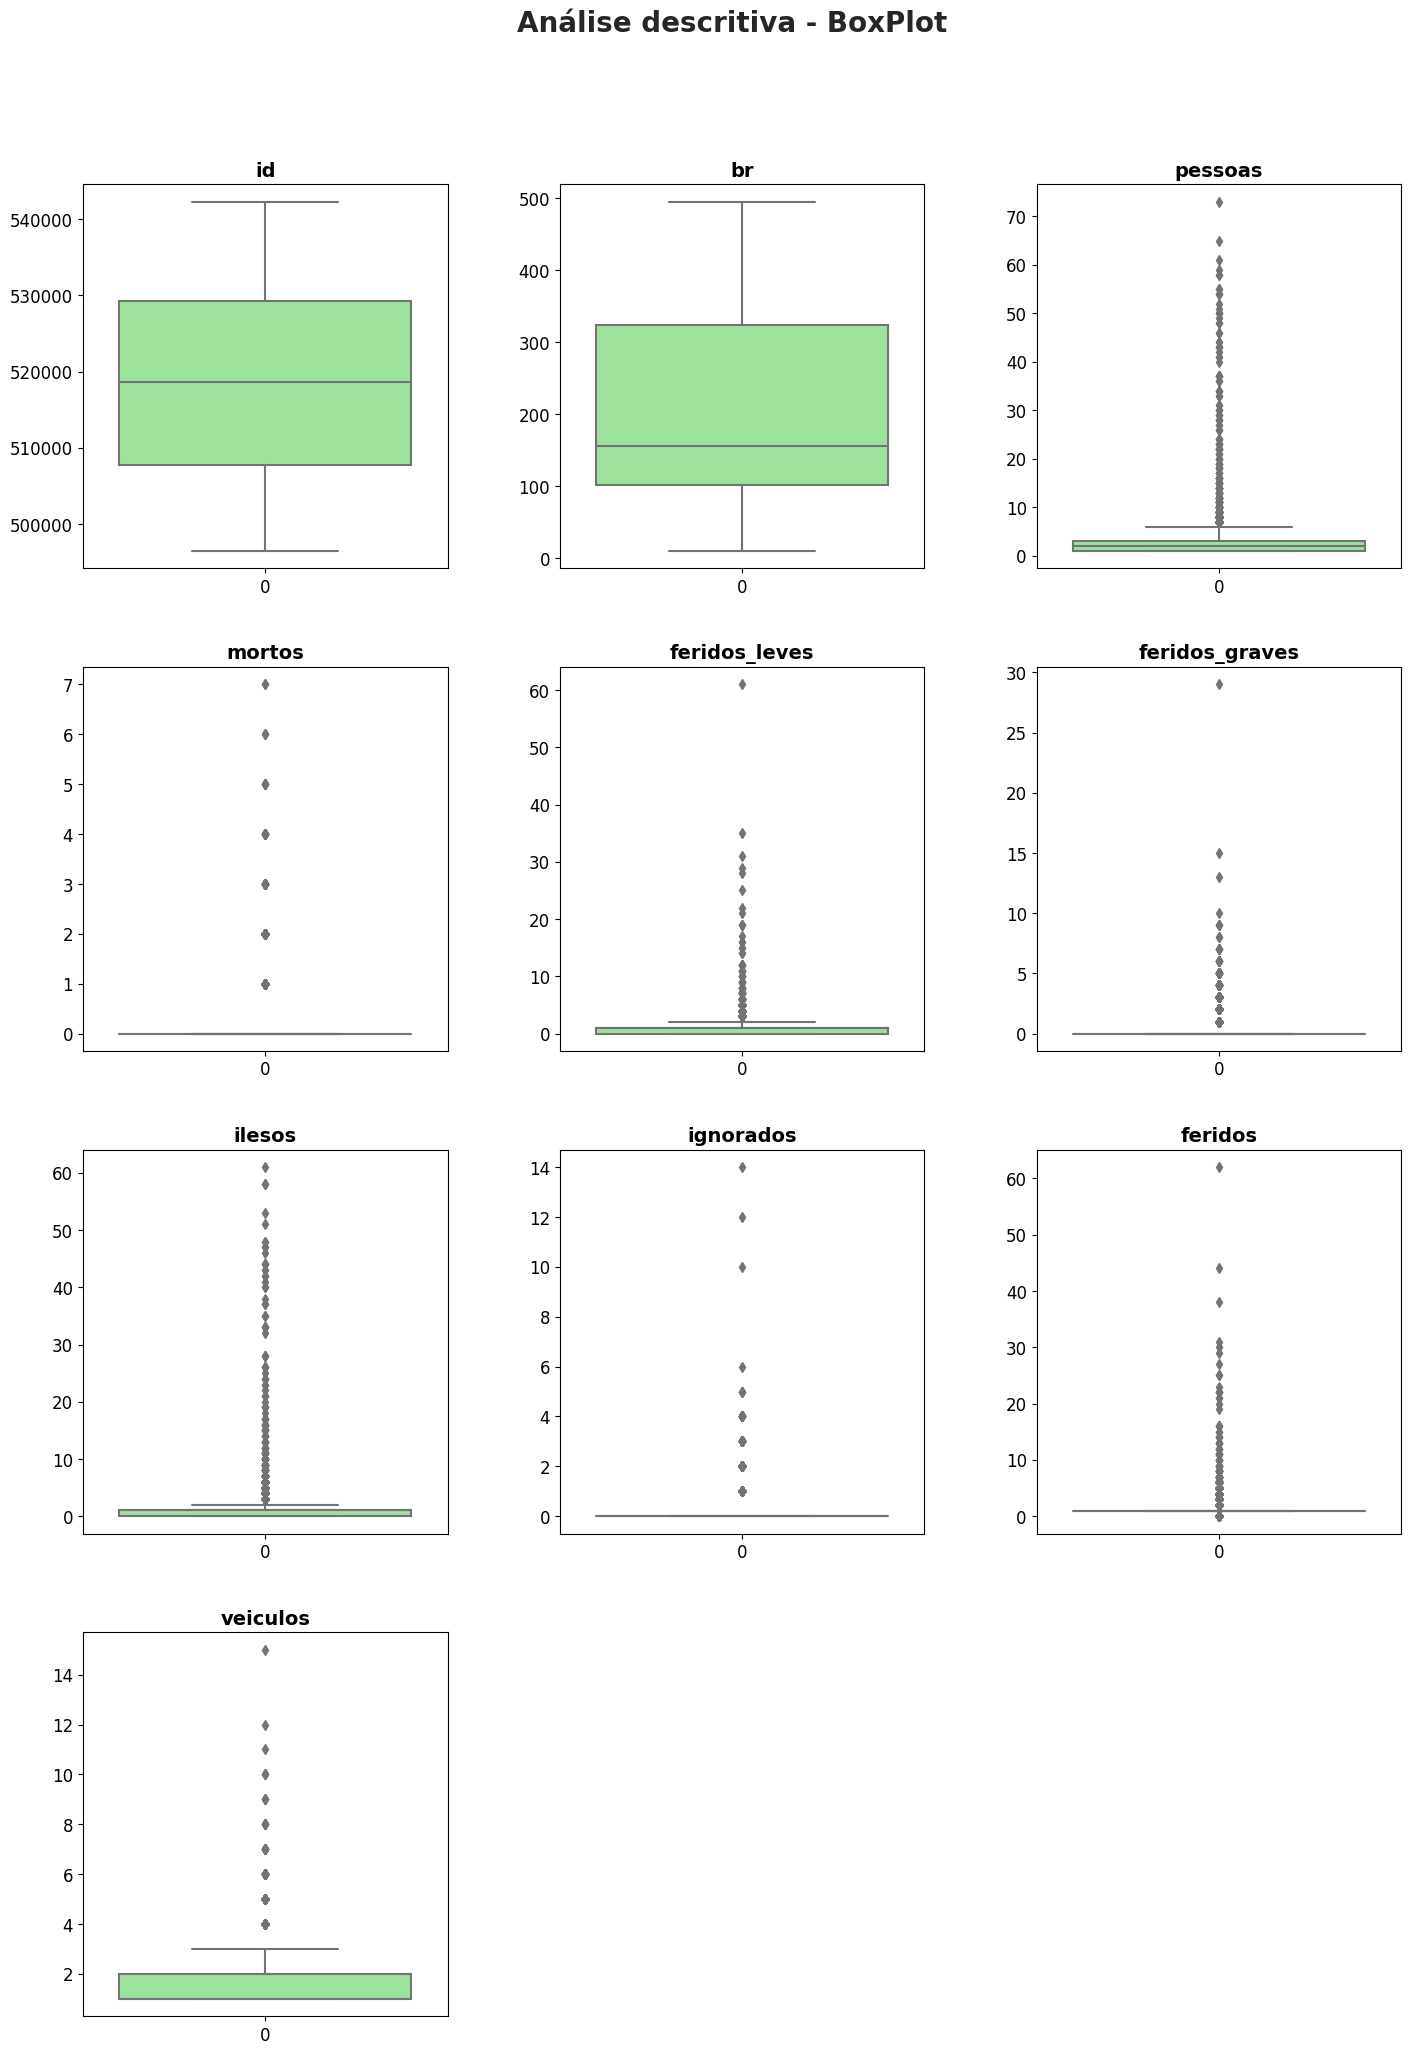

In [10]:
def analise_variaveis_boxplot(df):
    """
    Plota boxplots estilizados com título simplificado para todas as variáveis numéricas do dataframe fornecido
    em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os boxplots serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=5)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota boxplots para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.boxplot(data=df[column], ax=axes[i//3, i%3], color="lightgreen")
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - BoxPlot", fontsize=20, fontweight='bold', y=1.05)

# Plotando os boxplots estilizados com títulos simplificados usando a função definida
analise_variaveis_boxplot(data_PRF)

**Análise Boxplot**

Observando Os Boxplots das diferentes variáveis disponíveis no dataset, chegamos à algumas informações interessantes.

- Muitas das variáveis possuem um alto número de outliers, o que pode indicar tanto erros na coleta de dados, quanto acidadentes atípicos, que podem ser avaliados com maior profundidade.

- A distribuição das variáveis "mortos", "feridos" e "Ilesos" nos revela que a maioria dos acidentes é de baixa gradivdade, no entando existem também ocorrências de maior gravidade, identificadas pelos outliers.

- A mediana e o terceiro quartil da variável veículos estão no mesmo ponto, o que indica uma vaixa variabildiade dos dados, e nos leva a crer que a grande maioria dos acidentes envolve apenas 2 veículos (fora os outliers)

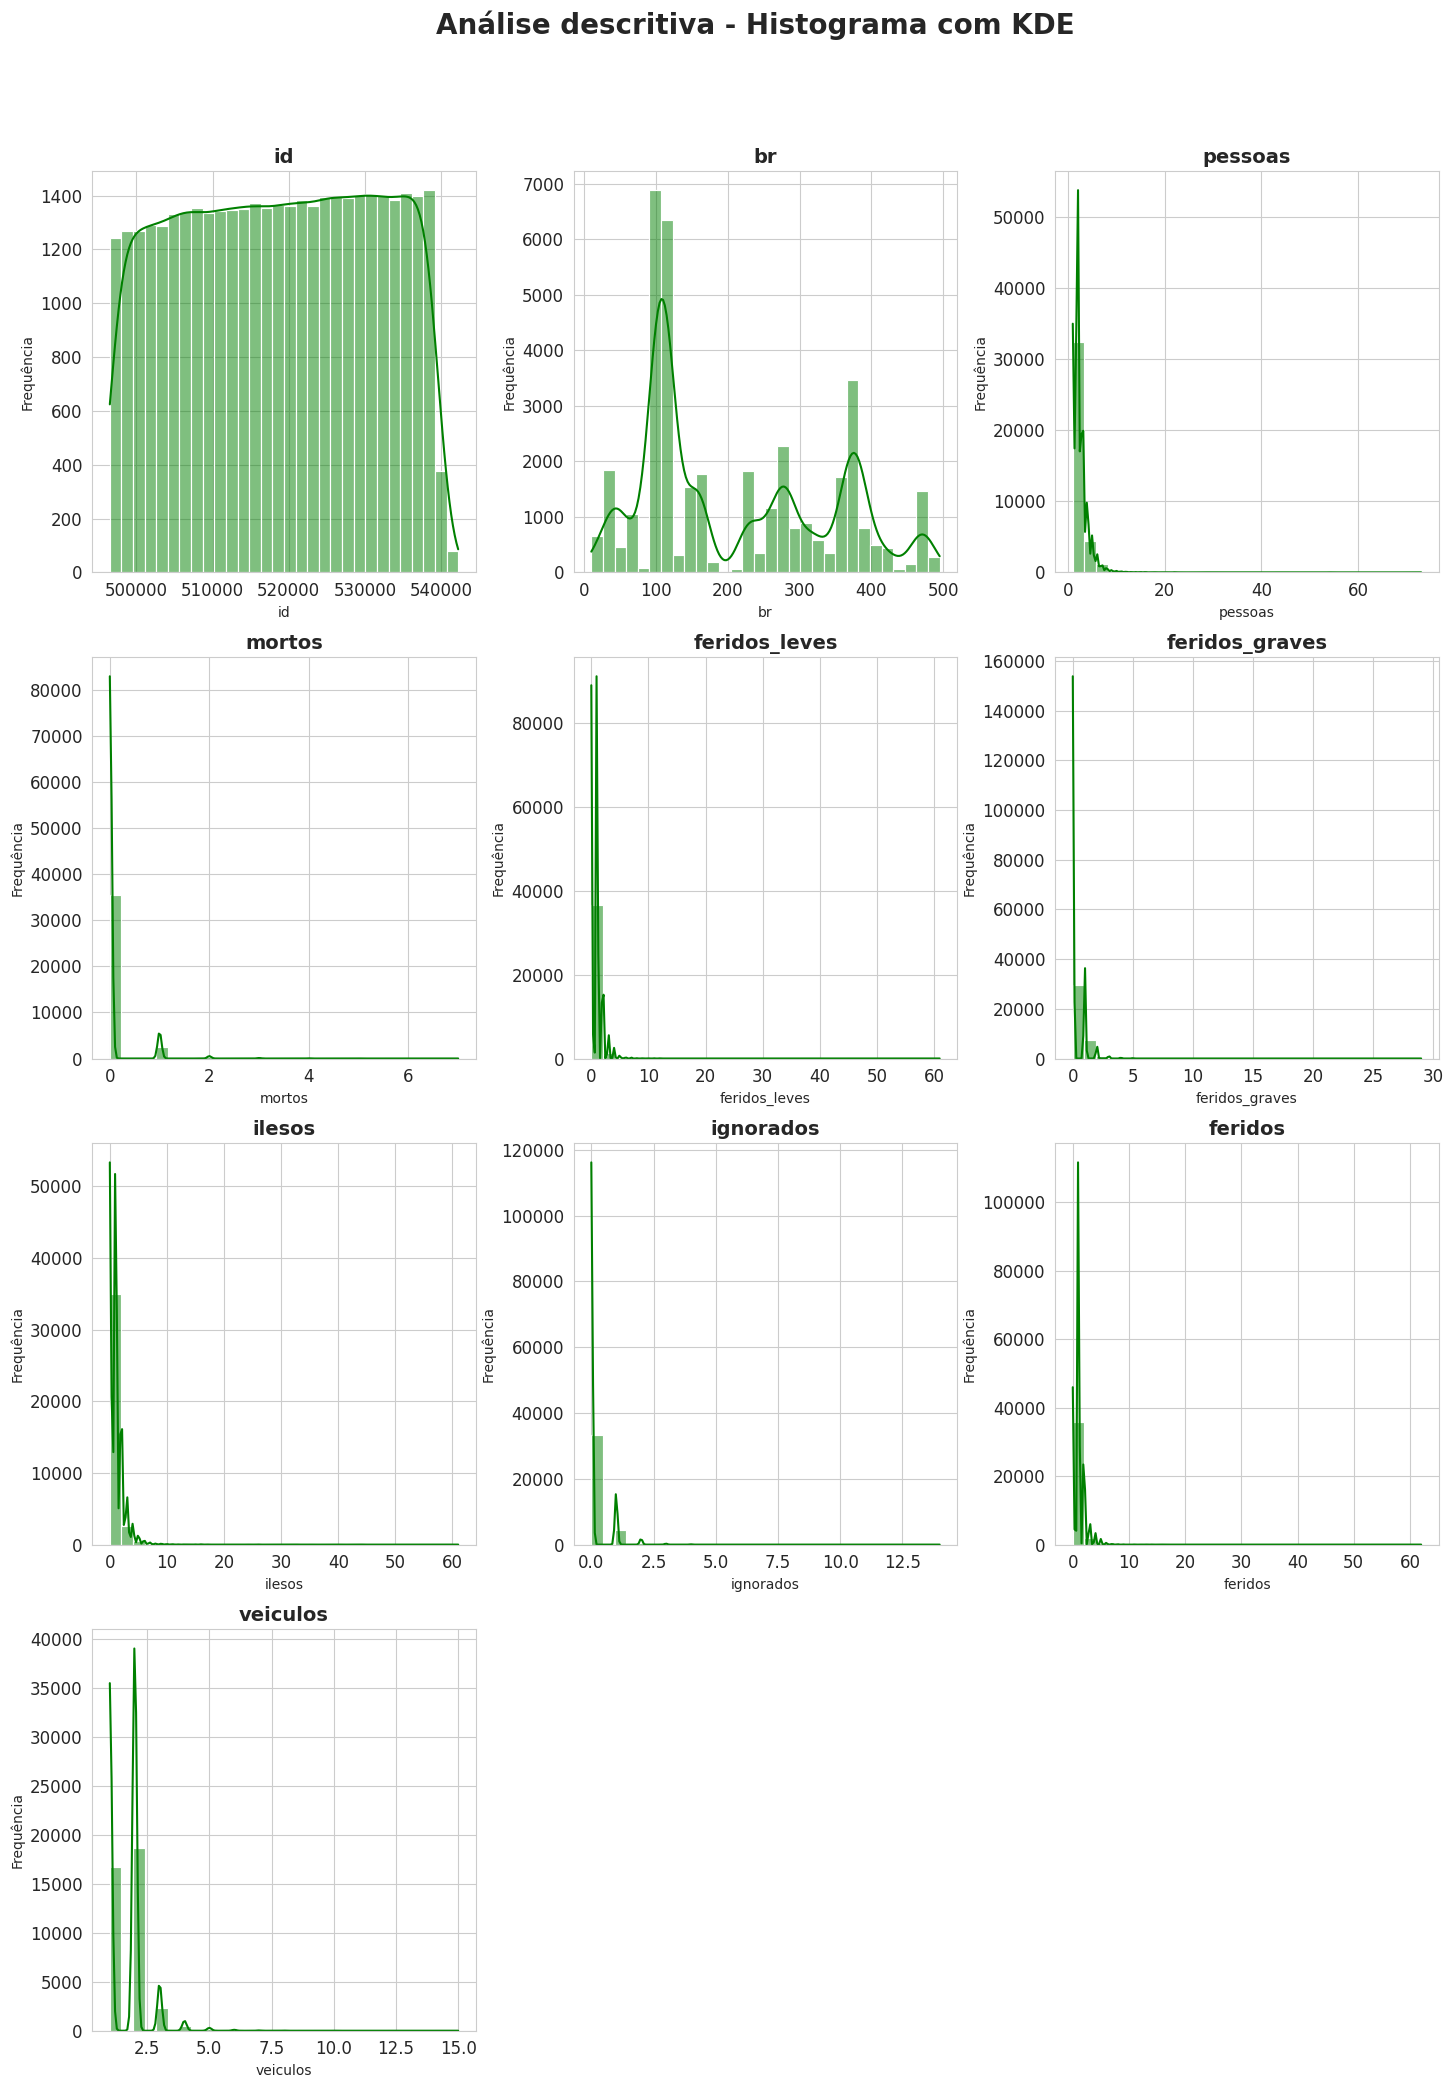

In [11]:
def analise_variaveis_hist(df):
    """
    Plota histogramas corrigidos com a curva KDE (Kernel Density Estimation) para todas as variáveis numéricas
    do dataframe fornecido em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os histogramas serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=4)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota histogramas com KDE para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.histplot(data=df[column], ax=axes[i//3, i%3], color="green", bins=30, kde=True)
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('Frequência')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - Histograma com KDE", fontsize=20, fontweight='bold', y=1.05)

# Plotando os histogramas com KDE corrigidos em um painel usando a função definida
analise_variaveis_hist(data_PRF)

**Análise histograma**

- Ao realizar a análise descritiva com KDE, fica ainda mais clara a percepção de que a grande maioria dos acidentes possuii poucos mortos ou feridos.

- Percebe-se também que grande parte dos acidentes envolve entre 1 e 2 veículos.

- A grande maioria dos acidentes envolve poucas pessoas.

# Análise das variáveis categóricas

Obtidas as conclusões a respeito das variáveis numéricas, é possível aprofundar as análises através da avaliação das variáveis categóricas.

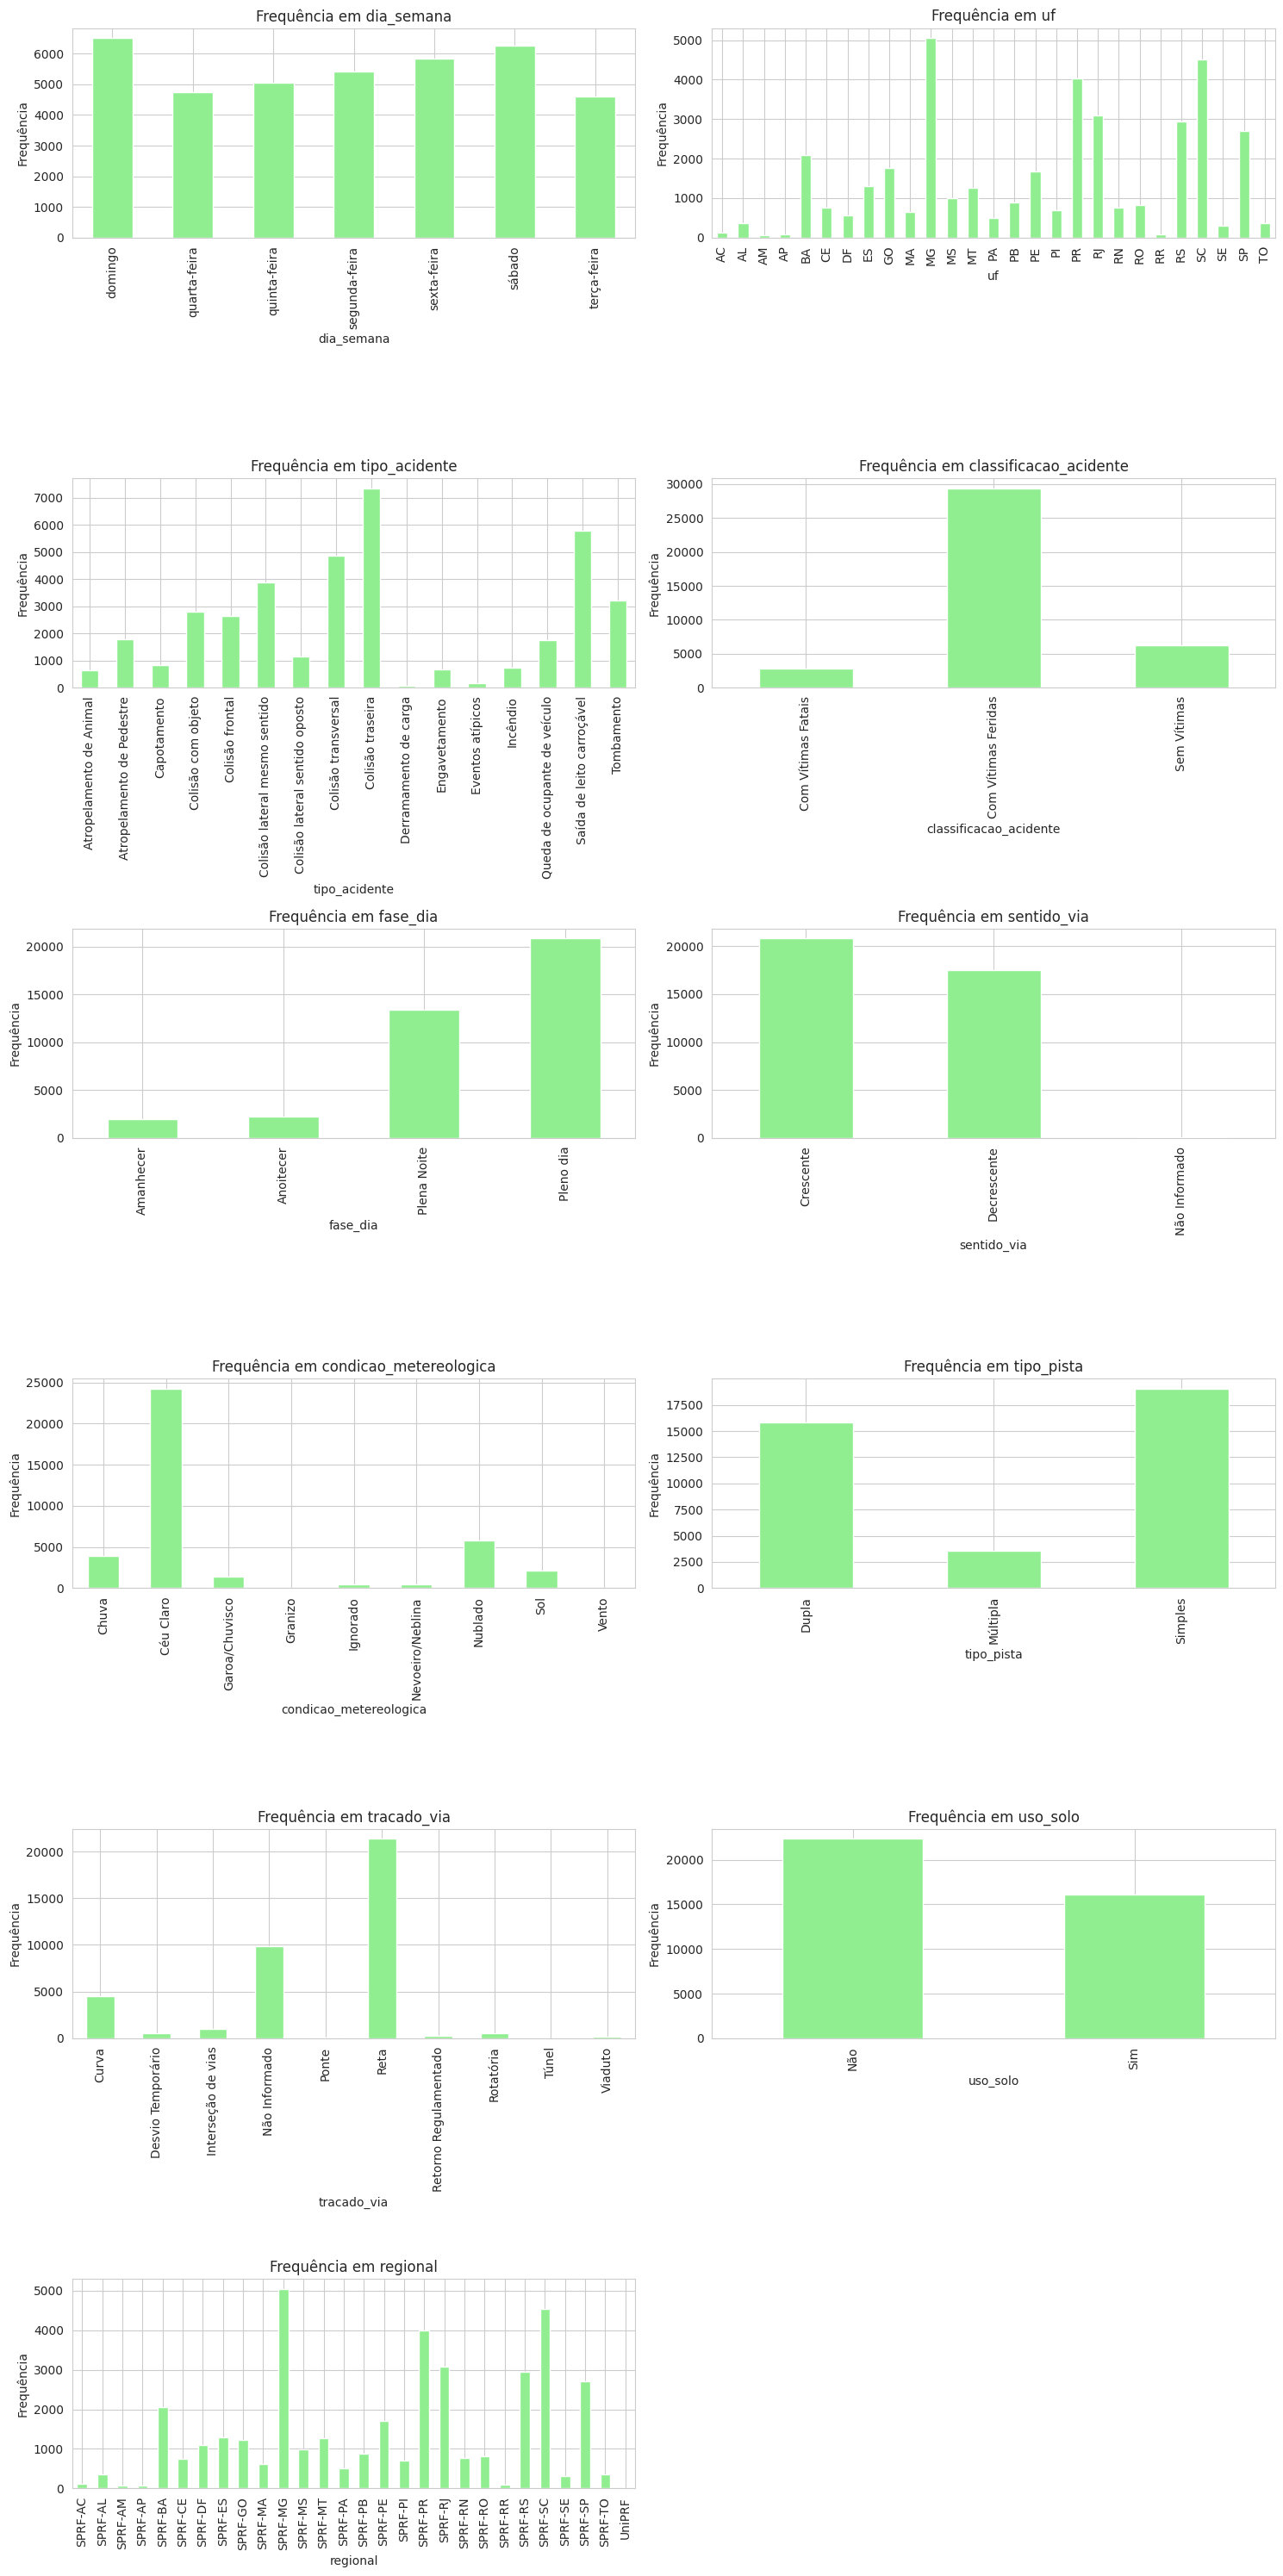

In [12]:
def analise_categorias(df, corte_cardinalidade=30, graficos_por_linha=2):
    """
    Plota a frequência de categorias para variáveis categóricas em um DataFrame.

    Parâmetros:
    - df: DataFrame para plotagem.
    - corte_cardinalidade: Cardinalidade máxima para uma coluna ser considerada (padrão é 30).
    - graficos_por_linha: Quantidade de gráficos por linha (padrão é 3).

    Retorna:
    - Exibe os gráficos de barras.
    """

    # Gera metadados para o DataFrame
    metadados = []
    for coluna in df.columns:
        metadados.append({
            'Variável': coluna,
            'Tipo': df[coluna].dtype,
            'Cardinalidade': df[coluna].nunique()
        })

    df_metadados = pd.DataFrame(metadados)

    # Filtra colunas com cardinalidade maior que o corte e tipos não numéricos
    variaveis_categoricas = df_metadados[(df_metadados['Cardinalidade'] <= corte_cardinalidade) & (df_metadados['Tipo'] == 'object')]

    # Calcula o número de linhas e colunas para os subplots
    n_linhas = -(-len(variaveis_categoricas) // graficos_por_linha)  # Ceiling division
    n_colunas = min(len(variaveis_categoricas), graficos_por_linha)

    # Plota as variáveis categóricas
    fig, axs = plt.subplots(nrows=n_linhas, ncols=n_colunas, figsize=(15, 5 * n_linhas))

    for i, (idx, linha) in enumerate(variaveis_categoricas.iterrows()):
        var = linha['Variável']
        ax = axs[i // graficos_por_linha, i % graficos_por_linha]
        df[var].value_counts().sort_index().plot(kind='bar', ax=ax, color='lightgreen')
        ax.set_title(f'Frequência em {var}')
        ax.set_ylabel('Frequência')
        ax.set_xlabel(var)

    # Remove os eixos vazios, se houver
    for j in range(i + 1, n_linhas * n_colunas):
        axs[j // graficos_por_linha, j % graficos_por_linha].axis('off')

    plt.tight_layout()
    plt.show()

# Testa a função com os dados e o corte padrão de cardinalidade
analise_categorias(data_PRF, corte_cardinalidade=30, graficos_por_linha=2)

Analisando as variáveis categóricas, é possível chegar a algumas conclusões bastante interessantes:

- A maioria dos acidentes registrados são colisões traseiras, registradas no estado de MG.
- A condição climática da maior parte dos acidentes é "Céu Claro", o que indica que condições adversas como chuva e neblina, apesar de influenciarem na gravidade dos acidentes, não são determinantes para um maior número de ocorrências.
- A maioria dos acidentes foram registrados em pista simples e em linha reta, o que pode sugerir, por exemplo, ultrapassagens indevidas, ou uma má sinalização na pista.